# Titanic Notebook 필사 01 - DieTanic
(https://www.kaggle.com/ash316/eda-to-prediction-dietanic)

- Notebook's Main purpose : give an idea how is the workflow in **any predictive modeling problem.** 

### Contents of the Notebook:  
###### Part1: Exploratory Data Analysis(EDA):  
1)Analysis of the features.  
2)Finding any relations or trends considering multiple features.  

###### Part2: Feature Engineering and Data Cleaning:  
1)Adding any few features.  
2)Removing redundant features.  
3)Converting features into suitable form for modeling.  
  
###### Part3: Predictive Modeling  
1)Running Basic Algorithms.  
2)Cross Validation.  
3)Ensembling.  
4)Important Features Extraction.  

## Part1: Exploratory Data Analysis(EDA)   

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [176]:
train_df = pd.read_csv('./train.csv')
test_df  = pd.read_csv('./test.csv')

In [177]:
#Checking Data 1
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [178]:
#Checking Data 2
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [179]:
#Checking Data 3 - Null Value
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [180]:
#Checking Data 4
train_col = list(train_df.keys())
train_col.remove('PassengerId')
for i in train_col:
    temp = train_df[i].value_counts()
    print(f'{i} : {temp} \n')

Survived : 0    549
1    342
Name: Survived, dtype: int64 

Pclass : 3    491
1    216
2    184
Name: Pclass, dtype: int64 

Name : Fortune, Mr. Charles Alexander                1
Troutt, Miss. Edwina Celia "Winnie"           1
Coxon, Mr. Daniel                             1
Mellinger, Miss. Madeleine Violet             1
Dahl, Mr. Karl Edwart                         1
                                             ..
Caldwell, Master. Alden Gates                 1
Sundman, Mr. Johan Julian                     1
Sedgwick, Mr. Charles Frederick Waddington    1
Andersson, Miss. Ellis Anna Maria             1
Funk, Miss. Annie Clemmer                     1
Name: Name, Length: 891, dtype: int64 

Sex : male      577
female    314
Name: Sex, dtype: int64 

Age : 24.00    30
22.00    27
18.00    26
28.00    25
19.00    25
         ..
55.50     1
74.00     1
0.92      1
70.50     1
12.00     1
Name: Age, Length: 88, dtype: int64 

SibSp : 0    608
1    209
2     28
4     18
3     16
8      7
5 

### 1-1) Target - Survived
    First, we need to focus on how many people Survived. It is our purpose in this competition.

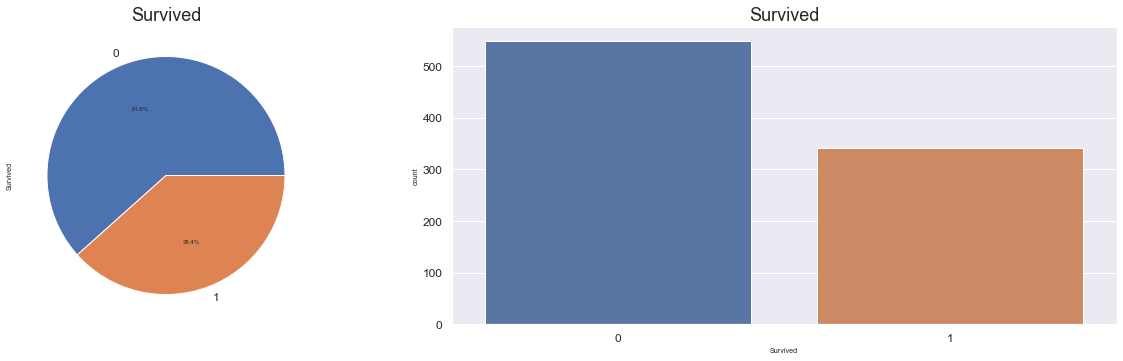

In [181]:
f,ax = plt.subplots(1,2,figsize=(18,5))
plt.rc('axes', labelsize=12)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=12)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=12)  # y축 눈금 폰트 크기
plt.rc('legend', fontsize=15)  # 범례 폰트 크기

train_df['Survived'].value_counts().plot.pie(autopct = '%1.1f%%', # 소수점 아래 한자리까지 표시
                                            #shadow = Ture, # 그림자 유무
                                            #explode = explode, # 파이 조각이 돌출되는 정도 설정
                                             ax = ax[0])
ax[0].set_title('Survived',fontsize = 18)
sns.countplot('Survived',data = train_df,ax=ax[1])
ax[1].set_title('Survived',fontsize = 18)
plt.tight_layout()
plt.show()

### Type of Features
    Before we dig down more to get better insights from data, classify features to each type.  
    
- Categorical Features  
    : Sex, Embarked<br> 
<br>
- Ordinal Features  
    : Pclass<br>
<br>  
- Continous Features   
    : Age, Fare

### 1-2) Categorical Features
    : Sex, Embarked

In [182]:
#Sex
pd.crosstab(train_df['Sex'],train_df['Survived'],margins = True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


<AxesSubplot:xlabel='Survived', ylabel='Sex'>

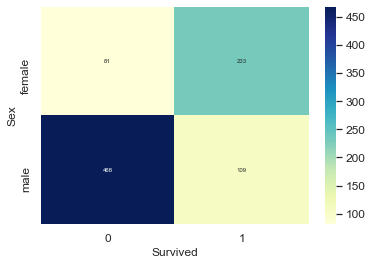

In [183]:
sns.heatmap(pd.crosstab(train_df['Sex'],train_df['Survived']),
           annot=True, fmt = "d",cbar=True, cmap='YlGnBu')

#camp : https://matplotlib.org/3.2.1/tutorials/colors/colormaps.html

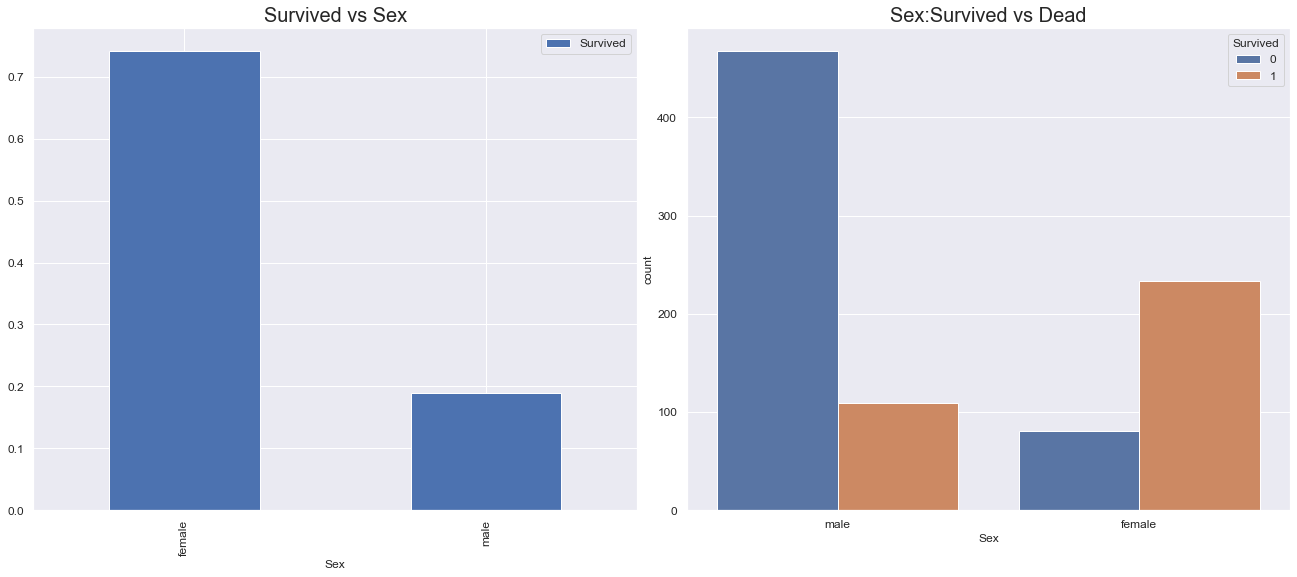

In [184]:
f,ax = plt.subplots(1,2,figsize = (18,8))
plt.rc('axes', labelsize=12)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)  
plt.rc('legend', fontsize=12)
plt.rc('legend',title_fontsize = 12)

train_df[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax = ax[0]) #Survived ratio
ax[0].set_title('Survived vs Sex',fontsize = 20)
sns.countplot('Sex',hue = 'Survived', data = train_df, ax = ax[1])
ax[1].set_title('Sex:Survived vs Dead', fontsize = 20)
plt.tight_layout()
plt.show()

Observation:  
The number of men on the ship is lot more than the number of women.  
But, The survival rates for a women on the ship is around 73% while that for men in around 18-19%.  

In [185]:
#Embarked : 탑승한 곳
pd.crosstab(train_df['Embarked'],train_df['Survived'],margins = True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Embarked,,,
C,75,93,168
Q,47,30,77
S,427,217,644
All,549,340,889


<AxesSubplot:xlabel='Survived', ylabel='Embarked'>

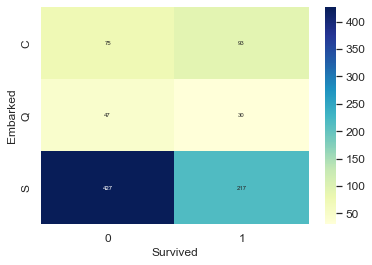

In [186]:
sns.heatmap(pd.crosstab(train_df['Embarked'],[train_df['Survived']]),
           annot=True, fmt = "d",cbar=True, cmap='YlGnBu')

In [187]:
# 왜 이렇겐 안되지?
# f,ax = plt.subplots(1,2,figsize=(18,5))
# train_df['Embarked'].value_counts().plot.pie(autopct = '%1.1f%%',ax = ax[0])
# sns.factorplot('Embarked','Survived',data = train_df,ax = ax[1])
# plt.show()

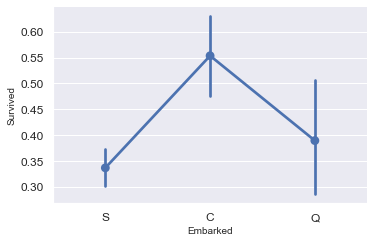

In [188]:
#factorplot : 평균 꺾은선 그래프
sns.factorplot('Embarked','Survived',data = train_df)
fig = plt.gcf() #객체에 대한 정보 알아내기
fig.set_size_inches(5,3)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10)
plt.xlabel('Embarked',fontsize = 10)
plt.ylabel('Survived',fontsize = 10)
plt.show()

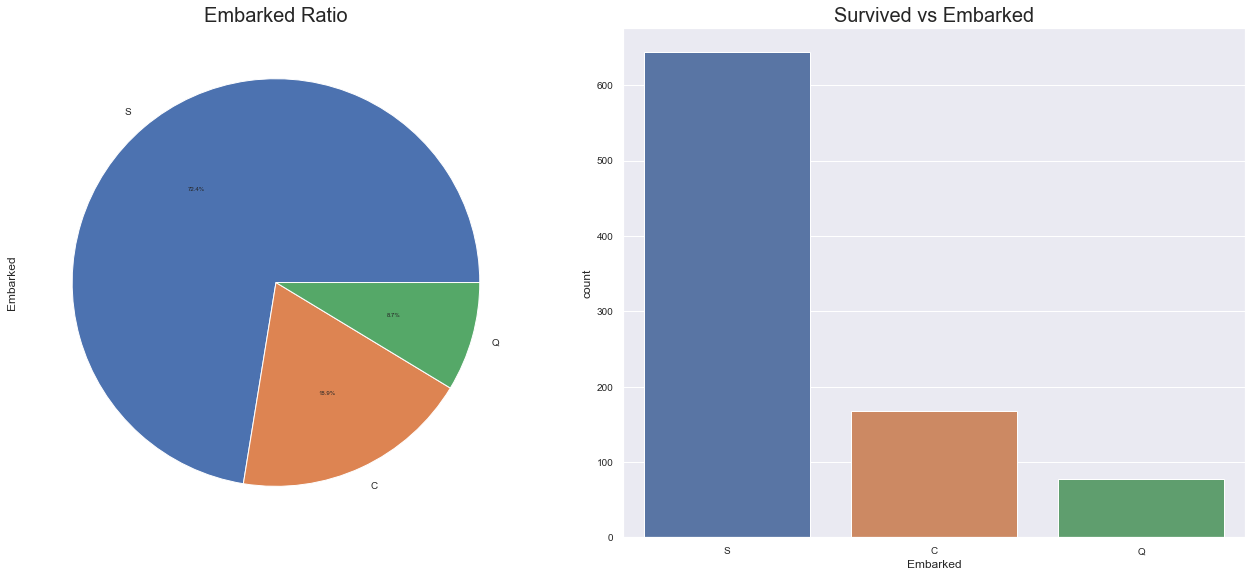

In [189]:
f,ax = plt.subplots(1,2,figsize = (18,8))
train_df['Embarked'].value_counts().plot.pie(autopct = '%1.1f%%',ax = ax[0])
ax[0].set_title('Embarked Ratio',fontsize = 20)
sns.countplot('Embarked', data = train_df, ax = ax[1])
ax[1].set_title('Survived vs Embarked',fontsize = 20)
plt.tight_layout()
plt.show()

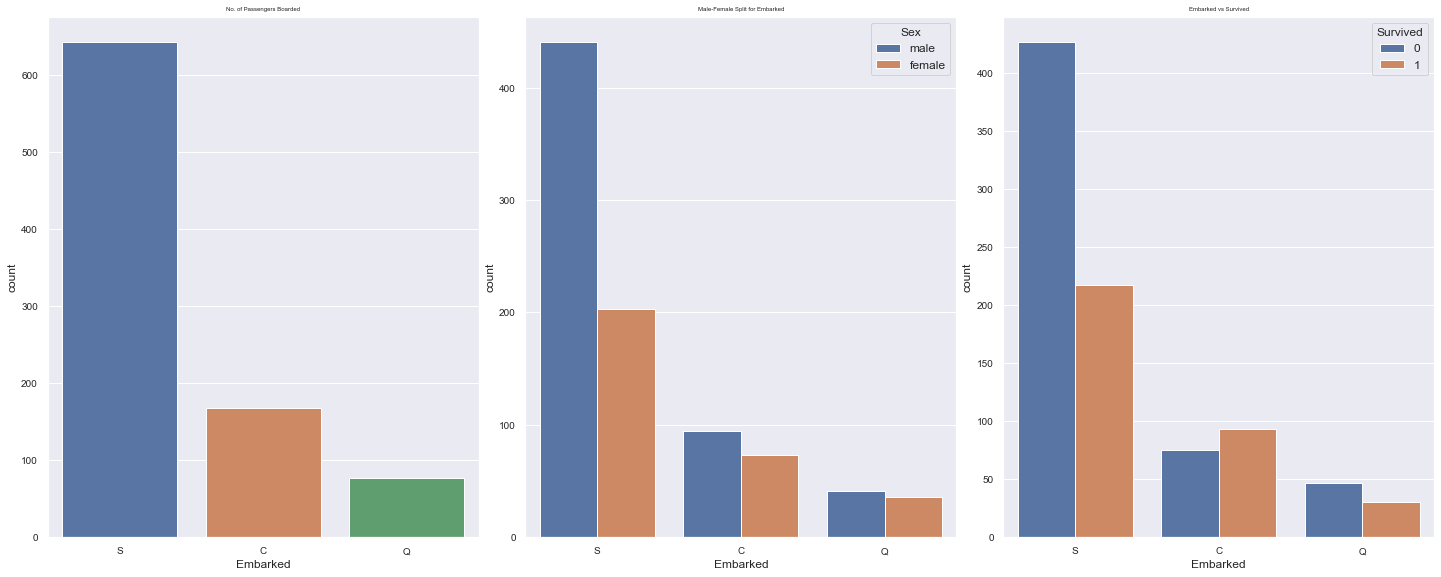

In [190]:
f,ax = plt.subplots(1,3,figsize = (20,8))
sns.countplot('Embarked', data = train_df, ax = ax[0])
ax[0].set_title('No. of Passengers Boarded')
sns.countplot('Embarked',hue = 'Sex',data = train_df, ax= ax[1])
ax[1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked',hue = 'Survived',data = train_df,ax = ax[2])
ax[2].set_title('Embarked vs Survived')
#plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
plt.tight_layout()
plt.show()

Observation:  
1)Maximum passenegers boarded from S.  

2)The Embark S looks to the port from where majority of the rich people boarded. (We can get more reason when we check Pclass feature)

### 1-3)Ordinal Features
    : Pclass

In [191]:
train_df[['Pclass','Fare']].groupby(['Pclass']).mean()

,Fare
Pclass,
1,84.154687
2,20.662183
3,13.675550


- The lower number of Pclass, the higher Fare

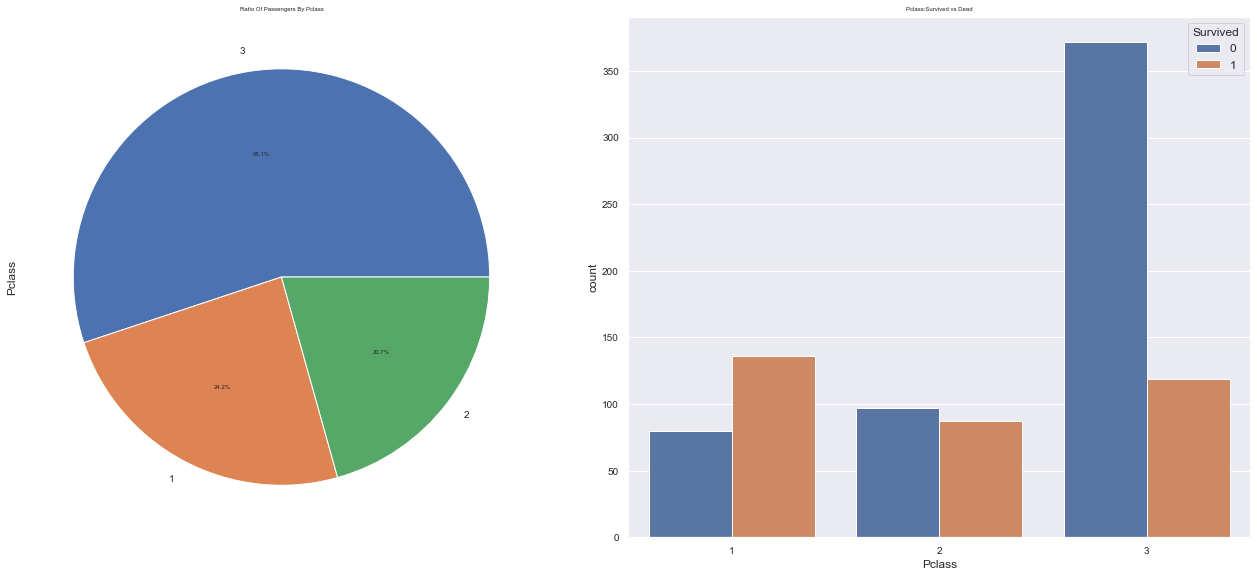

In [192]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train_df['Pclass'].value_counts().plot.pie(autopct = '%1.1f%%',ax = ax[0])
ax[0].set_title('Ratio Of Passengers By Pclass')
sns.countplot('Pclass',hue='Survived',data=train_df,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.tight_layout()
plt.show()

### Pclass & Embarked & Sex
    :Now we check whether there is correlation between Pclass & Embarked & Sex

In [193]:
pd.crosstab(train_df['Pclass'],train_df['Embarked'],margins = True).style.background_gradient(cmap='summer_r')

Embarked,C,Q,S,All
Pclass,,,,
1,85,2,127,214
2,17,3,164,184
3,66,72,353,491
All,168,77,644,889


- Port Q had almost 95% of the passengers were from Pclass3. > Poor Port
- From port S, lot of passengers(70% over) were boared. > comparatively Rich Port

In [194]:
pd.crosstab([train_df['Embarked'],train_df['Pclass']],[train_df['Survived']],margins = True).style.background_gradient(cmap='summer_r')

<AxesSubplot:xlabel='Survived', ylabel='Embarked-Pclass'>

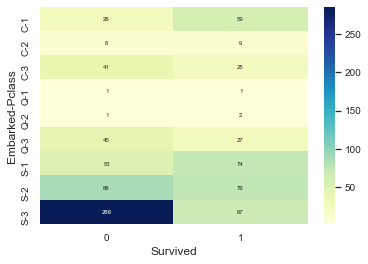

In [195]:
sns.heatmap(pd.crosstab([train_df['Embarked'],train_df['Pclass']],[train_df['Survived']]),
           annot=True, fmt = "d",cbar=True, cmap='YlGnBu')

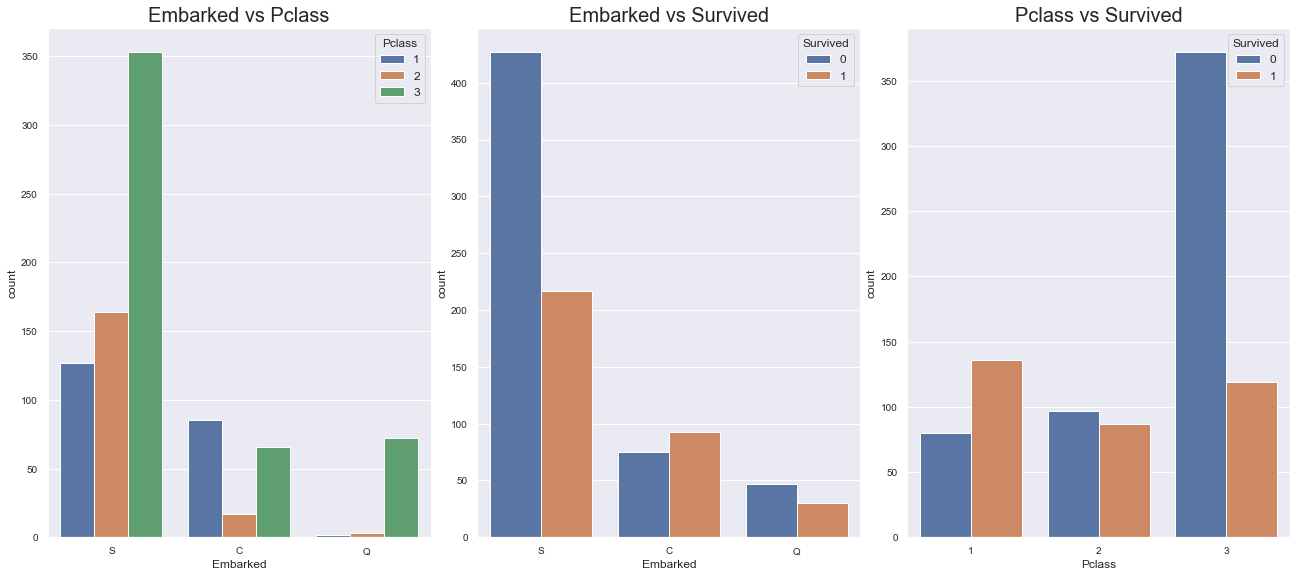

In [196]:
f,ax = plt.subplots(1,3,figsize = (18,8))
sns.countplot('Embarked',hue = 'Pclass', data = train_df,ax = ax[0])
ax[0].set_title('Embarked vs Pclass',fontsize = 20)
sns.countplot('Embarked',hue = 'Survived',data = train_df,ax = ax[1])
ax[1].set_title('Embarked vs Survived',fontsize =20)
sns.countplot('Pclass',hue = 'Survived',data = train_df, ax = ax[2])
ax[2].set_title('Pclass vs Survived', fontsize =20)
plt.tight_layout()
plt.show()

Observation:  
1)Maximum passenegers boarded from S. Majority of them being from Pclass3.
  
2)The Passengers from C look to be lucky as a good proportion of them survived.   
The reason for this maybe the rescue of all the Pclass1 and Pclass2 Passengers. (From below graphs can get more detail)  

3)Port Q had almost 95% of the passengers were from Pclass3.

4)The Embark S have low chances for survival, that is because many passengers from Pclass3 around 81% didn't survive.

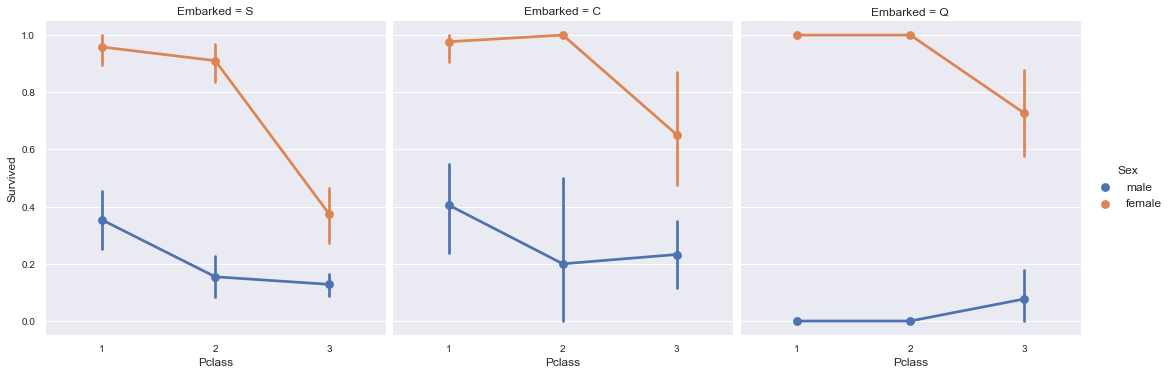

In [197]:
sns.factorplot('Pclass','Survived',hue = 'Sex', col = 'Embarked', data = train_df)
plt.show()

Observations:  
1)The survival chances are almost 1 for women for Pclass1 and Pclass2 irrespective of the Pclass.

2)Port S looks to be very unlucky for Pclass3 Passenegers as the survival rate for both men and women is very low.(Money Matters)

3)Port Q looks looks to be unlukiest for Men, as almost all were from Pclass 3.

### Impute NaN Value of Embarked with mode

In [198]:
#Impute Embarked na value with mode
print(train_df['Embarked'].isnull().sum())
train_df['Embarked'].fillna('S',inplace = True)
print(train_df['Embarked'].isnull().sum())

2
0


In [199]:
test_df['Embarked'].fillna('S',inplace = True)
print(test_df['Embarked'].isnull().sum())

0


### 1-4) SibSip / Parch  
    : This feature represents whether a person is alone or with his family members.  


In [200]:
pd.crosstab(train_df['SibSp'],train_df['Survived']).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


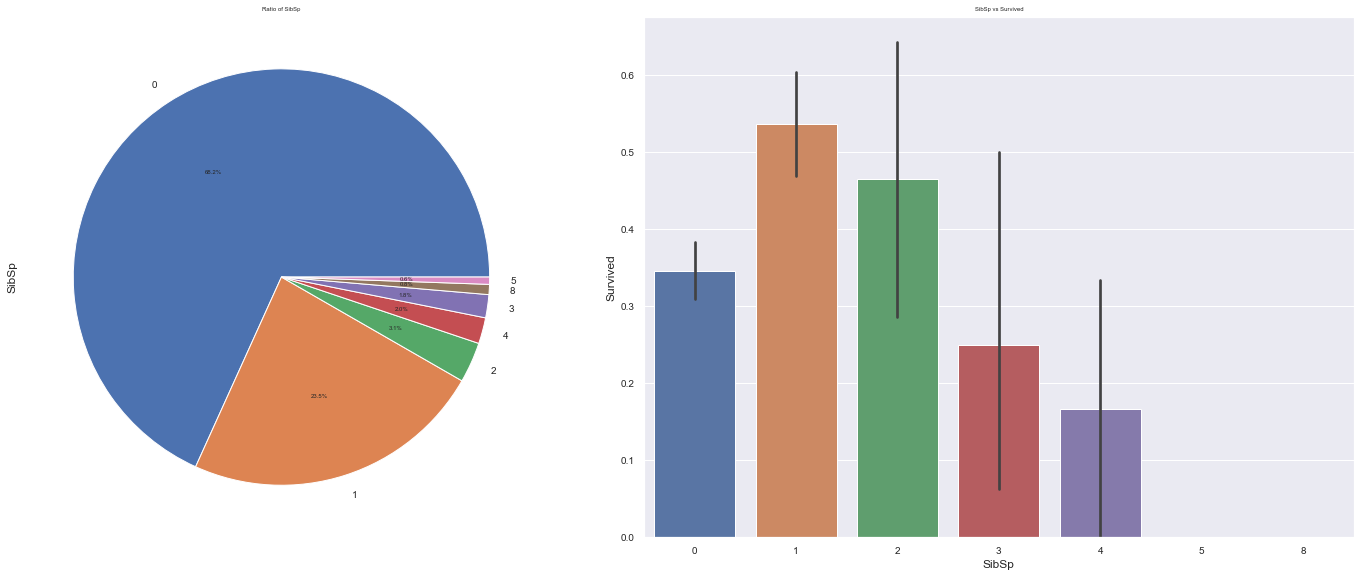

In [201]:
f,ax=plt.subplots(1,2,figsize=(20,8))
train_df['SibSp'].value_counts().plot.pie(autopct = '%1.1f%%',ax = ax[0])
ax[0].set_title('Ratio of SibSp')
sns.barplot('SibSp','Survived',data=train_df,ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.tight_layout()
plt.show()

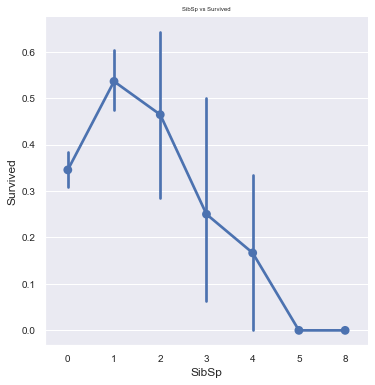

In [202]:
sns.factorplot('SibSp','Survived',data=train_df)
plt.title('SibSp vs Survived')
plt.show()

### SibSp & Pclass

In [203]:
pd.crosstab(train_df['SibSp'],train_df["Pclass"]).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


Observations:  
Surprisingly the survival for families with 5-8 members is 0%. The reason may be Pclass??

The reason is Pclass. The crosstab shows that Person with SibSp>3 were all in Pclass3. It is imminent that all the large families in Pclass3(>3) died.

In [204]:
pd.crosstab(train_df['Parch'],train_df['Pclass']).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


- The crosstab again shows that larger families were in Pclass3.

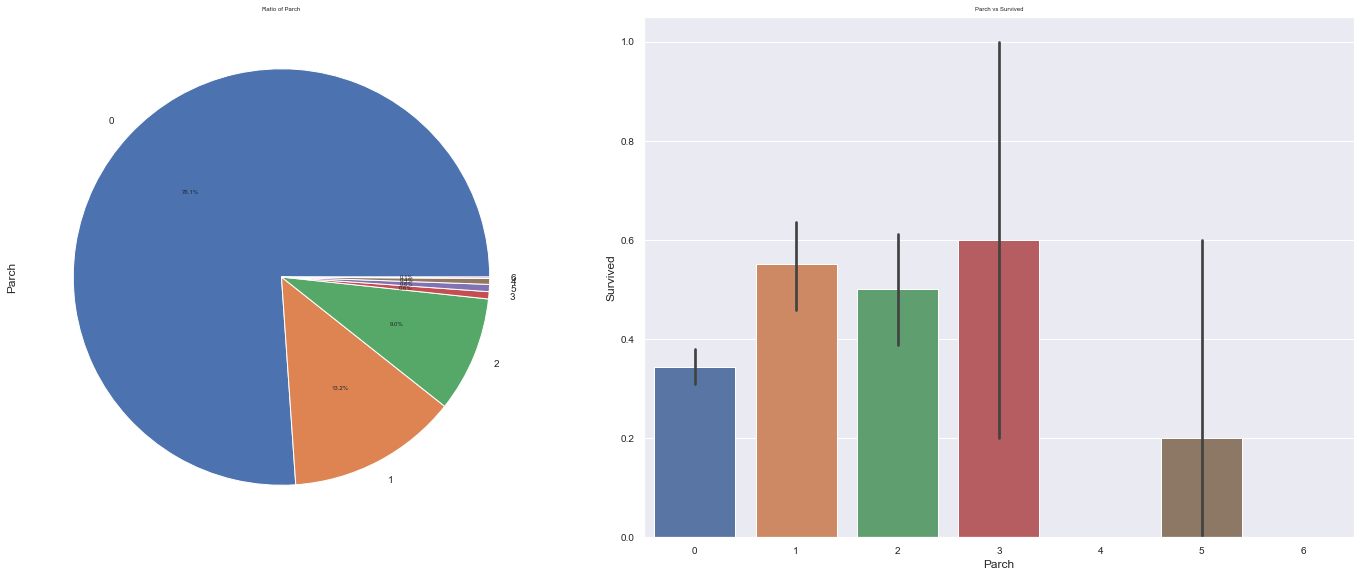

In [205]:
f,ax=plt.subplots(1,2,figsize=(20,8))
train_df['Parch'].value_counts().plot.pie(autopct = '%1.1f%%',ax = ax[0])
ax[0].set_title('Ratio of Parch')
sns.barplot('Parch','Survived',data=train_df,ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.tight_layout()
plt.show()

Observation:  
Here too the results are quite similar. Passengers with their parents onboard have greater chance of survival. It however reduces as the number goes up.

The chances of survival is good for somebody who has 1-3 parents on the ship. Being alone also proves to be fatal and the chances for survival decreases when somebody has >4 parents on the ship.

### 1-5) Continous Features
    : Age, Fare

In [206]:
#Fare
train_df['Fare'].describe()[['max','min','mean']]

max     512.329200
min       0.000000
mean     32.204208
Name: Fare, dtype: float64

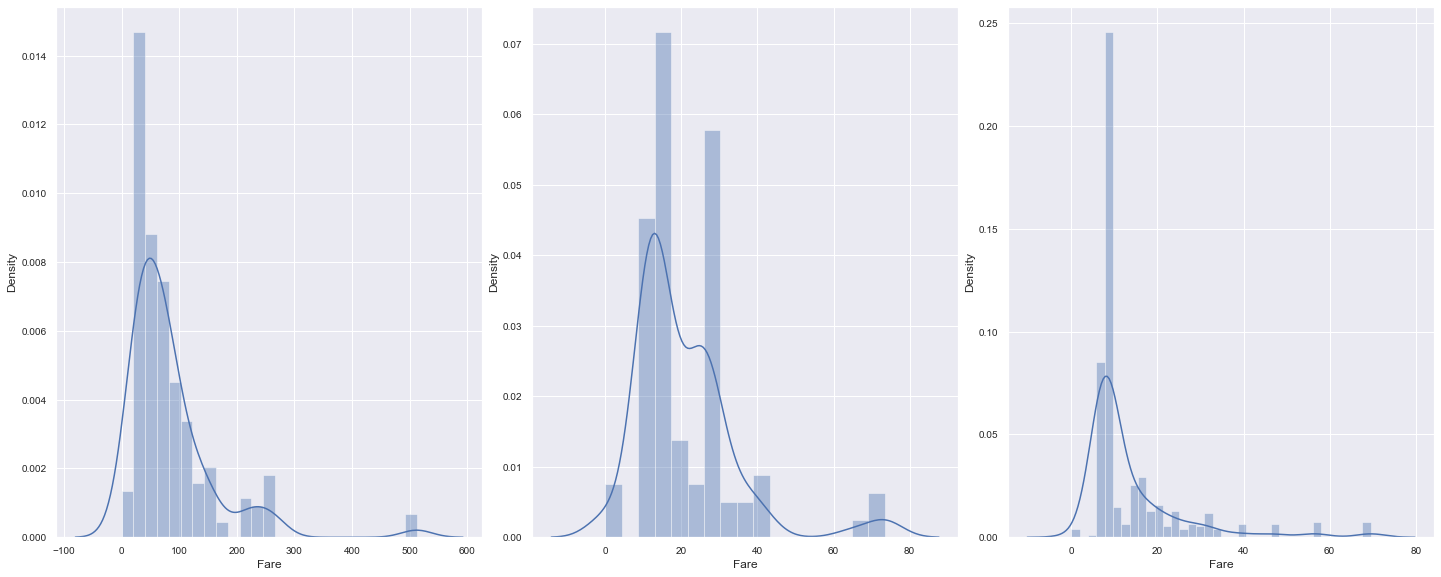

In [207]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(train_df[train_df['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
ax[0].set_title('')
sns.distplot(train_df[train_df['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
ax[1].set_title('')
sns.distplot(train_df[train_df['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
ax[2].set_title('')
plt.tight_layout()
plt.show()

In [208]:
train_df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [209]:
print('Oldest Passenger was of:',train_df['Age'].max(),'Years')
print('Youngest Passenger was of:',train_df['Age'].min(),'Years')
print('Average Age on the ship:',train_df['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


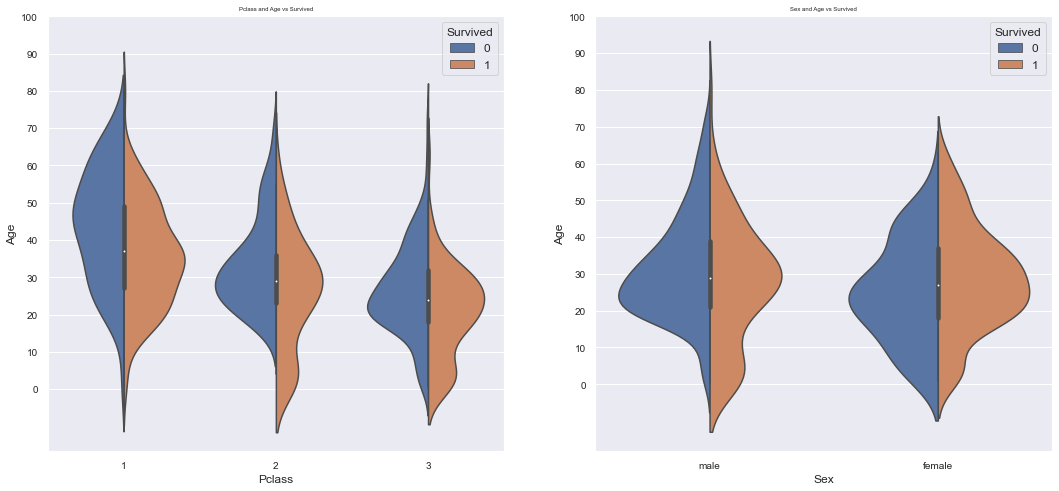

In [210]:
#Violinplot.
#Violin plot depicts "distributions of numeric data" for one or more groups using "density curve"s.
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived", data=train_df,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=train_df,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

As we had seen earlier, the Age feature has 177 null values. To replace these NaN values, we can assign them the mean age of the dataset.<br>  
we can check the Name feature. Looking upon the feature, we can see that the names have a salutation like Mr or Mrs. Thus we can assign the mean values of Mr and Mrs to the respective groups.

In [211]:
#Impute Age's Null value using Name features
#We can guess Age from Initial Name
train_df['initial_name'] = 0 #초기화
test_df['initial_name'] = 0
for i in train_df:
    train_df['initial_name'] = train_df['Name'].str.extract('([A-Za-z]+)\.')
for i in test_df:
    test_df['initial_name'] = test_df['Name'].str.extract('([A-Za-z]+)\.')
train_df['initial_name'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Jonkheer      1
Lady          1
Countess      1
Capt          1
Don           1
Mme           1
Ms            1
Sir           1
Name: initial_name, dtype: int64

In [212]:
pd.crosstab(train_df['initial_name'],train_df['Sex']).T.style.background_gradient(cmap='summer_r') 

initial_name,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


- There are some misspelled initial name

In [213]:
train_df['initial_name'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],
                            ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr','Mr'],
                            inplace=True)
test_df['initial_name'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],
                            ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr','Mr'],
                            inplace=True)

- But, this part has fault because test_df has the initial name 'Dona' which is not contained in train_df.<br>
So, We need to prefer using IF() or other methods that we can cope with this unexpected situation.<br>

In [214]:
print(train_df['initial_name'].value_counts())
print('')
print(train_df.groupby('initial_name')['Age'].mean())

Mr        529
Miss      186
Mrs       127
Master     40
Other       9
Name: initial_name, dtype: int64

initial_name
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64


In [215]:
#Imputing with Mean ages. It is not certain that is best method.
train_df.loc[(train_df.Age.isnull())&(train_df['initial_name']=='Mr'),'Age']=33
train_df.loc[(train_df.Age.isnull())&(train_df['initial_name']=='Mrs'),'Age']=36
train_df.loc[(train_df.Age.isnull())&(train_df['initial_name']=='Master'),'Age']=5
train_df.loc[(train_df.Age.isnull())&(train_df['initial_name']=='Miss'),'Age']=22
train_df.loc[(train_df.Age.isnull())&(train_df['initial_name']=='Other'),'Age']=46
print(train_df['Age'].isnull().sum())

test_df.loc[(test_df.Age.isnull())&(test_df['initial_name']=='Mr'),'Age']=33
test_df.loc[(test_df.Age.isnull())&(test_df['initial_name']=='Mrs'),'Age']=36
test_df.loc[(test_df.Age.isnull())&(test_df['initial_name']=='Master'),'Age']=5
test_df.loc[(test_df.Age.isnull())&(test_df['initial_name']=='Miss'),'Age']=22
test_df.loc[(test_df.Age.isnull())&(test_df['initial_name']=='Other'),'Age']=46
print(test_df['Age'].isnull().sum())

0
0


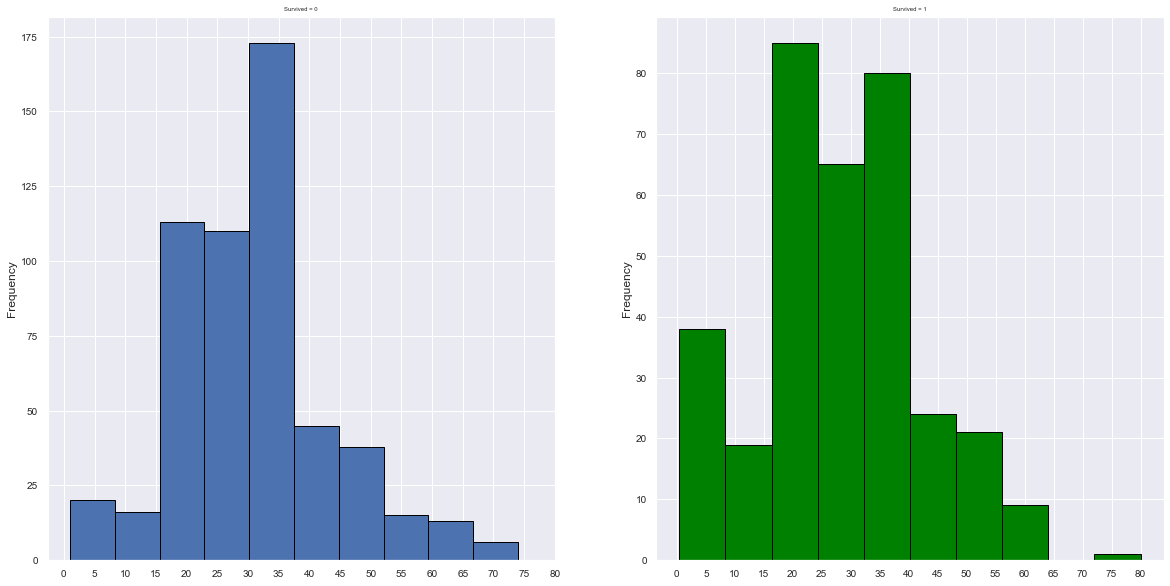

In [216]:
f,ax = plt.subplots(1,2,figsize = (20,10))
train_df[train_df['Survived'] == 0].Age.plot.hist(ax = ax[0],edgecolor = 'black')
ax[0].set_title('Survived = 0')
ax[0].set_xticks(list(range(0,85,5)))
train_df[train_df['Survived'] == 1].Age.plot.hist(ax = ax[1],edgecolor = 'black',color = 'green')
ax[1].set_title('Survived = 1')
ax[1].set_xticks(list(range(0,85,5)))
plt.show()

Observations:  
1)The Toddlers(age<5) were saved in large numbers(The Women and Child First Policy).
  
2)The oldest Passenger was saved(80 years).

3)Maximum number of deaths were in the age group of 30-40.

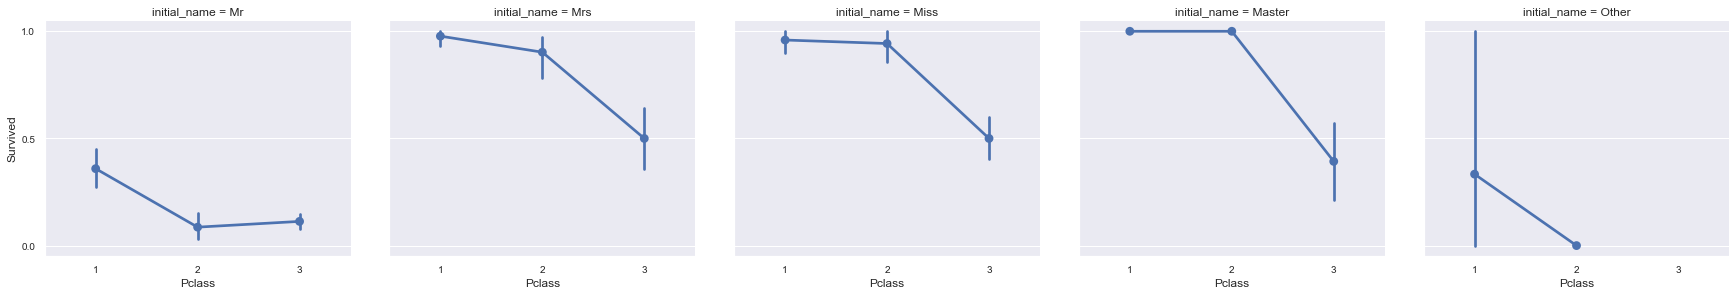

In [217]:
sns.factorplot('Pclass','Survived',col = 'initial_name',data = train_df)
sns.set(font_scale=3)
plt.tight_layout()
plt.show()

The Women and Child first policy thus holds true irrespective of the class.

### Correlation Between the Featrues

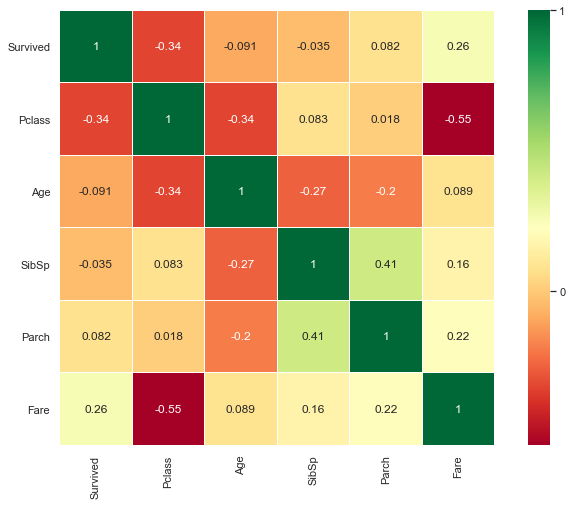

In [221]:
sns.heatmap(train_df.drop(['PassengerId'],axis=1).corr(),cmap='RdYlGn',linewidths=0.2,square = True,
            annot = True)#data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(12,8)
sns.set(font_scale=10)
#plt.tight_layout()
plt.show()
#heatmap : https://www.carladasilvamatos.com/blog/2019/12/25/lnn5xyodn2kv4i0o2mg9agdw07qgo0

## Part2: Feature Engineering and Data Cleaning

### 2-1) Age_band
Problem With Age Feature:
As I have mentioned earlier that Age is a continous feature, there is a problem with Continous Variables in Machine Learning Models.

Eg:If I say to group or arrange Sports Person by Sex, We can easily segregate them by Male and Female.

Now if I say to group them by their Age, then how would you do it? If there are 30 Persons, there may be 30 age values. Now this is problematic.

We need to convert these continous values into categorical values by either Binning or Normalisation. I will be using binning i.e group a range of ages into a single bin or assign them a single value.

Okay so the maximum age of a passenger was 80. So lets divide the range from 0-80 into 5 bins. So 80/5=16. So bins of size 16.

In [222]:
train_df['Age_band']=0
train_df.loc[train_df['Age']<=16,'Age_band']=0
train_df.loc[(train_df['Age']>16)&(train_df['Age']<=32),'Age_band']=1
train_df.loc[(train_df['Age']>32)&(train_df['Age']<=48),'Age_band']=2
train_df.loc[(train_df['Age']>48)&(train_df['Age']<=64),'Age_band']=3
train_df.loc[train_df['Age']>64,'Age_band']=4
train_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,initial_name,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [223]:
test_df['Age_band']=0
test_df.loc[test_df['Age']<=16,'Age_band']=0
test_df.loc[(test_df['Age']>16)&(test_df['Age']<=32),'Age_band']=1
test_df.loc[(test_df['Age']>32)&(test_df['Age']<=48),'Age_band']=2
test_df.loc[(test_df['Age']>48)&(test_df['Age']<=64),'Age_band']=3
test_df.loc[test_df['Age']>64,'Age_band']=4
test_df.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,initial_name,Age_band
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs,2


In [224]:
train_df['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')

,Age_band
1,382
2,325
0,104
3,69
4,11


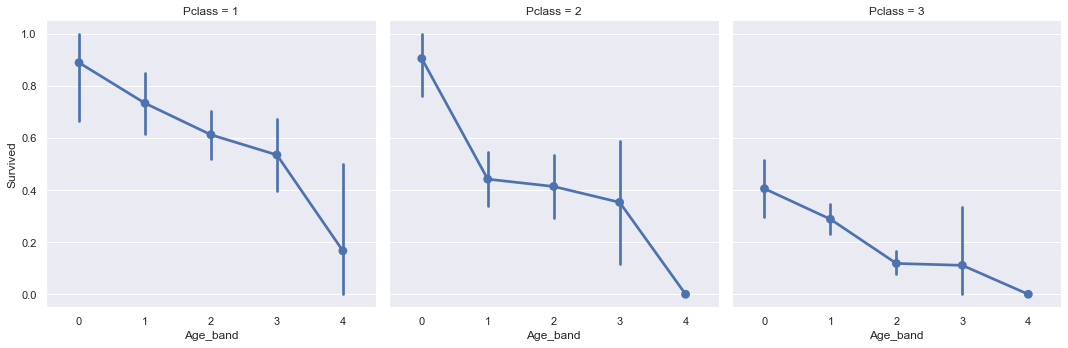

In [229]:
sns.factorplot('Age_band','Survived',data=train_df,col='Pclass')
plt.tight_layout()
plt.show()

### 2-2) Family_Size & Alone  
    :At this point, we can create a new feature called "Family_size" and "Alone" and analyse it. This feature is the summation of Parch and SibSp. It gives us a combined data so that we can check if survival rate have anything to do with family size of the passengers. Alone will denote whether a passenger is alone or not.

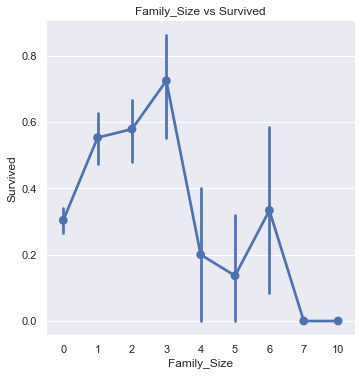

In [230]:
train_df['Family_Size']=0
train_df['Family_Size']=train_df['Parch']+train_df['SibSp']#family size
train_df['Alone']=0
train_df.loc[train_df.Family_Size==0,'Alone']=1#Alone
test_df['Family_Size']=0
test_df['Family_Size']=test_df['Parch']+test_df['SibSp']#family size
test_df['Alone']=0
test_df.loc[test_df.Family_Size==0,'Alone']=1#Alone

sns.factorplot('Family_Size','Survived',data = train_df)
plt.title('Family_Size vs Survived')
plt.show()

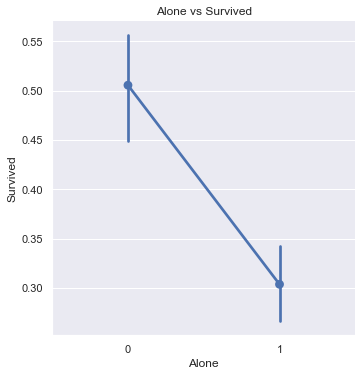

In [231]:
sns.factorplot('Alone','Survived',data=train_df)
plt.title('Alone vs Survived')
plt.show()

Observation:  
Family_Size=0 means that the passeneger is alone. Clearly, if you are alone or family_size=0,then chances for survival is very low. For family size > 4,the chances decrease too. This also looks to be an important feature for the model. Lets examine this further.

### 2-3) Fare_Randge  
    :Since fare is also a continous feature, we need to convert it into ordinal value. For this we will use pandas.qcut.

In [232]:
train_df['Fare_Range'] = pd.qcut(train_df['Fare'],4)
train_df.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


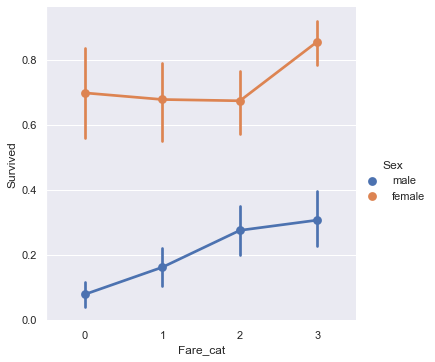

In [233]:
train_df['Fare_cat']=0
train_df.loc[train_df['Fare']<=7.91,'Fare_cat']=0
train_df.loc[(train_df['Fare']>7.91)&(train_df['Fare']<=14.454),'Fare_cat']=1
train_df.loc[(train_df['Fare']>14.454)&(train_df['Fare']<=31),'Fare_cat']=2
train_df.loc[(train_df['Fare']>31)&(train_df['Fare']<=513),'Fare_cat']=3

test_df['Fare_cat']=0
test_df.loc[test_df['Fare']<=7.91,'Fare_cat']=0
test_df.loc[(test_df['Fare']>7.91)&(test_df['Fare']<=14.454),'Fare_cat']=1
test_df.loc[(test_df['Fare']>14.454)&(test_df['Fare']<=31),'Fare_cat']=2
test_df.loc[(test_df['Fare']>31)&(test_df['Fare']<=513),'Fare_cat']=3

sns.factorplot('Fare_cat','Survived',data=train_df,hue='Sex')
plt.show()

### Converting String values into Numeric - onehot Encoding
    :Sex ,Embarked, initial_name
    :Since we cannot pass strings to a machine learning model, we need to convert features loke Sex, Embarked, etc into numeric values.

In [234]:
train_df['Sex'].replace(['male','female'],[0,1],inplace = True)
train_df['Embarked'].replace(['S','C','Q'],[0,1,2],inplace = True)
train_df['initial_name'].replace(['Mr',"Mrs","Miss","Master","Other"],[0,1,2,3,4],inplace = True)

test_df['Sex'].replace(['male','female'],[0,1],inplace = True)
test_df['Embarked'].replace(['S','C','Q'],[0,1,2],inplace = True)
test_df['initial_name'].replace(['Mr',"Mrs","Miss","Master","Other"],[0,1,2,3,4],inplace = True)

## Recheck Correlation After Feature_Engineering

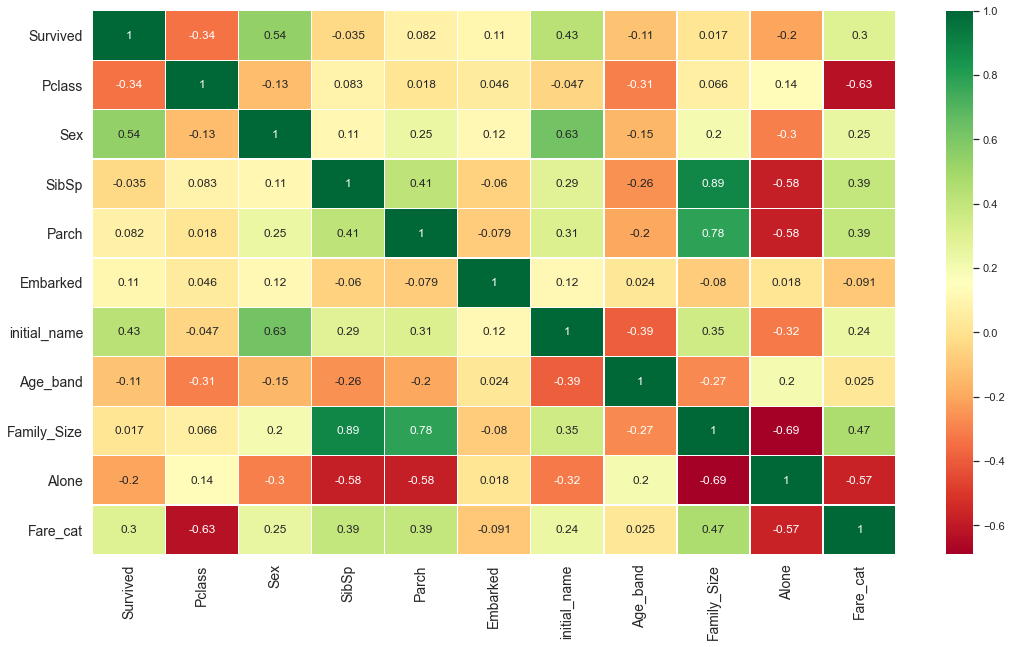

In [235]:
train_df = train_df.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1)
test_df = test_df.drop(['Name','Age','Ticket','Fare','Cabin','PassengerId'],axis=1)
sns.heatmap(train_df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
sns.set(font_scale=0.5)
fig=plt.gcf()
fig.set_size_inches(18,10)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

## Part3: Modeling for Predict Target value
    :predict whether the Passenger will survive or not 

In [147]:
#ML Packages : skelearn
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [148]:
#Data Partition
#train_df = train_df.drop(['PassengerId'],axis = 1)
test_df['Survived'] = 0

train_X= train_df.drop(['Survived'],axis = 1)
train_y = train_df['Survived']
test_X  = test_df.drop(['Survived'],axis = 1)
test_y  = test_df['Survived']

In [149]:
test_X['initial_name'].value_counts()

0    242
2     79
1     72
3     21
4      4
Name: initial_name, dtype: int64

In [150]:
print(train_X.info())
#y_train.head(5)
print(test_X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Pclass        891 non-null    int64
 1   Sex           891 non-null    int64
 2   SibSp         891 non-null    int64
 3   Parch         891 non-null    int64
 4   Embarked      891 non-null    int64
 5   initial_name  891 non-null    int64
 6   Age_band      891 non-null    int64
 7   Family_Size   891 non-null    int64
 8   Alone         891 non-null    int64
 9   Fare_cat      891 non-null    int64
dtypes: int64(10)
memory usage: 69.7 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Pclass        418 non-null    int64
 1   Sex           418 non-null    int64
 2   SibSp         418 non-null    int64
 3   Parch         418 non-null    int64
 4   Em

In [151]:
#SVM(rbf-SVM)
model = svm.SVC(kernel = 'rbf', C=1, gamma = 0.1)
model.fit(train_X,train_y)
prediction1 = model.predict(test_X)
print('Accuracy for rbf SVM is ' , metrics.accuracy_score(prediction1, test_y))

Accuracy for rbf SVM is  0.6100478468899522


In [152]:
#SVM(linear-SVM)
model = svm.SVC(kernel = 'linear',C=0.1,gamma = 0.1)
model.fit(train_X,train_y)
prediction2 = model.predict(test_X)
print("Accuracy for linear SVM is ", metrics.accuracy_score(prediction2, test_y))

Accuracy for linear SVM is  0.6004784688995215


In [153]:
#Logistic Regression
model = LogisticRegression()
model.fit(train_X,train_y)
prediction3 = model.predict(test_X)
print('Accuracy for logistic Regression is ',metrics.accuracy_score(prediction3,test_y))

Accuracy for logistic Regression is  0.6196172248803827


In [154]:
#Decision Tree
model = DecisionTreeClassifier()
model.fit(train_X,train_y)
prediction4 = model.predict(test_X)
print('Accuracyc for Decision Tree is ',metrics.accuracy_score(prediction4,test_y))

Accuracyc for Decision Tree is  0.6267942583732058


In [155]:
#KNN
model = KNeighborsClassifier()
model.fit(train_X,train_y)
prediction5 = model.predict(test_X)
print('Accuracyc for KNN is ', metrics.accuracy_score(prediction5,test_y))

Accuracyc for KNN is  0.6363636363636364


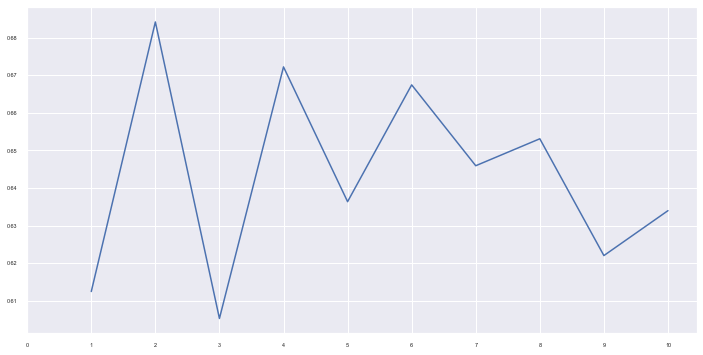

Accuracies for different values of n are: [0.61244019 0.68421053 0.60526316 0.6722488  0.63636364 0.66746411
 0.64593301 0.65311005 0.62200957 0.63397129] with the max value as  0.6842105263157895


In [156]:
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_y)))
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as ',a.values.max())

In [157]:
#Best KNN Model : n_neighbors = 2
model = KNeighborsClassifier(n_neighbors = 2)
model.fit(train_X,train_y)
prediction55 = model.predict(test_X)
print('Accuracyc for KNN is ', metrics.accuracy_score(prediction55,test_y))

Accuracyc for KNN is  0.6842105263157895


In [158]:
#Gaussian Navie Bayes
model = GaussianNB()
model.fit(train_X,train_y)
prediction6 = model.predict(test_X)
print("Accuracy for Navie Bayes is ", metrics.accuracy_score(prediction6,test_y))

Accuracy for Navie Bayes is  0.5550239234449761


In [159]:
#Random Forests
model = RandomForestClassifier(n_estimators = 100)
model.fit(train_X,train_y)
prediction7 = model.predict(test_X)
print('Accuracy for RF is ', metrics.accuracy_score(prediction7,test_y))

Accuracy for RF is  0.6220095693779905


## 3.Evaluate
## 3-1)Cross Validation
    :Let's say we divide the dataset into (k=5) parts. We reserve 1 part for testing and train the algorithm over the 4 parts.
    :We continue the process by changing the testing part in each iteration and training the algorithm over the other parts. The accuracies and errors are then averaged to get a average accuracy of the algorithm.

In [160]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
kfold = KFold(n_splits = 10, random_state=42)
xyz = []
accuracy = []
std = []
classifiers = ['Linear Svm','Radial Svm','Logistic Regression','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,train_X,train_y, cv = kfold, scoring = 'accuracy')
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_df2 = pd.DataFrame({'CV Mean':xyz, 'Std':std},index = classifiers)
new_models_df2 = new_models_df2.sort_values(by = ['CV Mean'],axis = 0)
new_models_df2


,CV Mean,Std
Linear Svm,0.793471,0.047797
Naive Bayes,0.801386,0.028999
Logistic Regression,0.805843,0.024061
Decision Tree,0.809226,0.024410
Random Forest,0.811473,0.028137
Radial Svm,0.828290,0.034427


<AxesSubplot:xlabel='Classifiers', ylabel='CV Mean'>

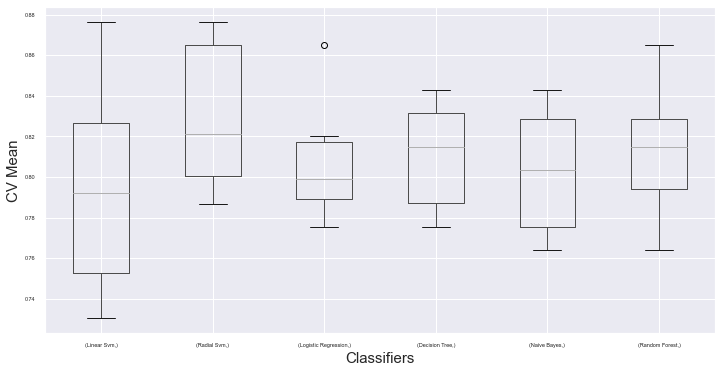

In [161]:
plt.subplots(figsize = (12,6))
box = pd.DataFrame(accuracy, index = [classifiers])
plt.rc('axes', labelsize='large')   # x,y축 label 폰트 크기
plt.xlabel('Classifiers',fontsize = 15)
plt.ylabel('CV Mean',fontsize = 15)
box.T.boxplot()

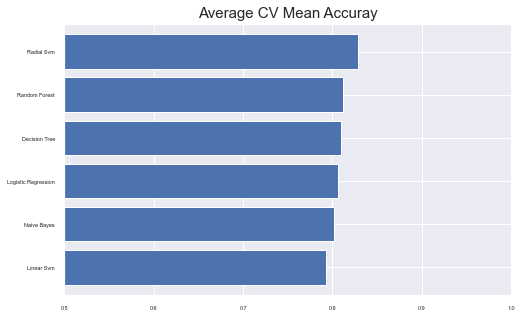

In [162]:
new_models_df2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuray',fontsize = 15)
fig = plt.gcf()
fig.set_size_inches(8,5)
plt.xlim([0.5,1])
plt.show()

## 3-2)Confusion Matrix
    :The classification accuracy can be sometimes misleading due to imbalance. We can get a summarized result with the help of confusion matrix, which shows where did the model go wrong, or which class did the model predict wrong.

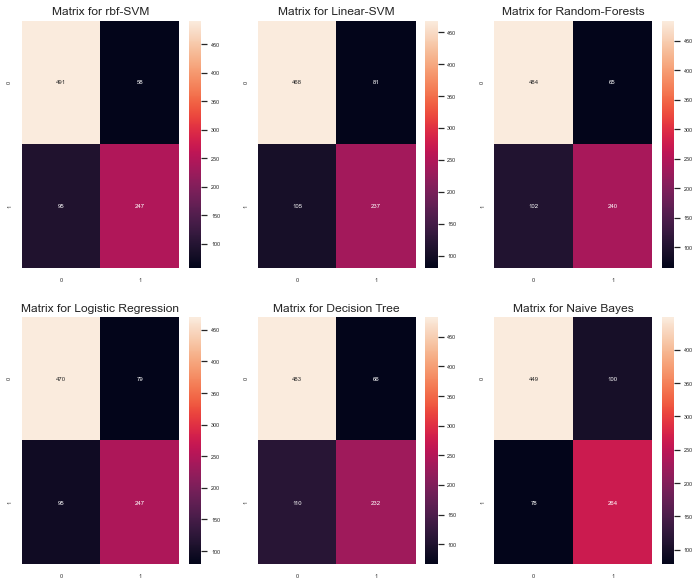

In [163]:
f,ax=plt.subplots(2,3,figsize=(12,10))
#1
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),train_X,train_y,cv=10)
sns.heatmap(confusion_matrix(train_y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM',fontsize = 12)
#2
y_pred = cross_val_predict(svm.SVC(kernel='linear'),train_X,train_y,cv=10)
sns.heatmap(confusion_matrix(train_y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM',fontsize = 12)
#3
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),train_X,train_y,cv=10)
sns.heatmap(confusion_matrix(train_y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for Random-Forests',fontsize = 12)
#4
y_pred = cross_val_predict(LogisticRegression(),train_X,train_y,cv=10)
sns.heatmap(confusion_matrix(train_y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Logistic Regression',fontsize = 12)
#5
y_pred = cross_val_predict(DecisionTreeClassifier(),train_X,train_y,cv=10)
sns.heatmap(confusion_matrix(train_y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Decision Tree',fontsize = 12)
#6
y_pred = cross_val_predict(GaussianNB(),train_X,train_y,cv=10)
sns.heatmap(confusion_matrix(train_y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Naive Bayes',fontsize = 12)
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

## 4.Hyper-Parameter Tuning
    :SVM / RF

In [164]:
#SVM
from sklearn.model_selection import GridSearchCV
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf','linear']
hyper={'kernel':kernel,'C':C,'gamma':gamma}
gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
gd.fit(train_X,train_y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8282593685267716
SVC(C=0.4, gamma=0.3)


[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:   18.2s finished


In [165]:
#RF
n_estimators=range(100,1000,100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
gd.fit(train_X,train_y)
print(gd.best_score_)
print(gd.best_estimator_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   31.6s finished


0.819327098110602
RandomForestClassifier(n_estimators=300, random_state=0)


## 5.Ensemble
    :Voting Classifier/ Bagging/ Boosting.

## 5-1)Voting Classifier
    :It is the simplest way of combining predictions from many different simple machine learning models. 
    It gives an average prediction result based on the prediction of all the submodels. 

In [166]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('NB',GaussianNB()),
                                              ('svm',svm.SVC(kernel='linear',probability=True))
                                             ], voting='soft').fit(train_X,train_y)
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(test_X,test_y))
cross=cross_val_score(ensemble_lin_rbf,train_X,train_y, cv = 10,scoring = "accuracy")
print('The cross validated score is',cross.mean())

The accuracy for ensembled model is: 0.6148325358851675
The cross validated score is 0.8249188514357053


## 5-2)Bagging
    :It works by applying similar classifiers on small partitions of the dataset and then taking the average of all the predictions. Due to the averaging,there is reduction in variance
    "Unlike Voting Classifier, Bagging makes use of similar classifiers."

In [167]:
#Bagged KNN :Bagging works best with models with high variance. 
#An example for this can be Decision Tree or Random Forests.
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),random_state=42,n_estimators=700)
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy for bagged KNN is:',metrics.accuracy_score(prediction,test_y))
result=cross_val_score(model,train_X,train_y,cv=10,scoring='accuracy')
print('The cross validated score for bagged KNN is:',result.mean())

The accuracy for bagged KNN is: 0.6148325358851675
The cross validated score for bagged KNN is: 0.8149188514357053


In [168]:
#Bagged DecisionTree
model=BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=0,n_estimators=100)
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy for bagged Decision Tree is:',metrics.accuracy_score(prediction,test_y))
result=cross_val_score(model,train_X,train_y,cv=10,scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:',result.mean())

The accuracy for bagged Decision Tree is: 0.6172248803827751
The cross validated score for bagged Decision Tree is: 0.8171410736579275


## 5-3)Boosting
    :AdaBoost(Adaptive Boosting) / Stochastic Gradient Boosting / XGBoost

In [169]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200,random_state=42,learning_rate=0.1)
result=cross_val_score(ada,train_X,train_y,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())

The cross validated score for AdaBoost is: 0.8249188514357055


In [170]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=500,random_state=42,learning_rate=0.1)
result=cross_val_score(grad,train_X,train_y,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())

The cross validated score for Gradient Boosting is: 0.8115230961298376


In [171]:
import xgboost as xg
xgboost=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
result=cross_val_score(xgboost,train_X,train_y,cv=10,scoring='accuracy')
print('The cross validated score for XGBoost is:',result.mean())

[10:25:13] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:25:14] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:25:15] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:25:16] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

In [ ]:
#Hyper-Parameter Tuning for AdaBoost
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
gd=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True)
gd.fit(train_X,train_y)
print(gd.best_score_)
print(gd.best_estimator_)

## 6.Feature Importance

[10:46:34] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


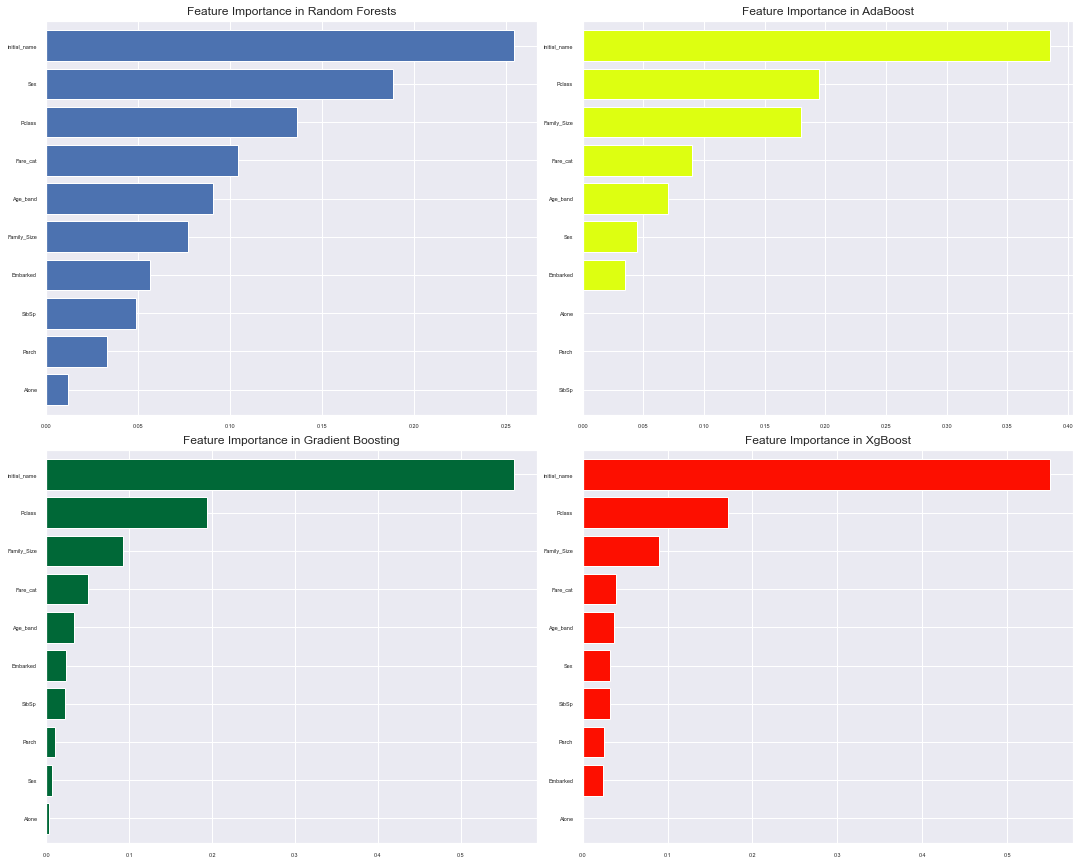

In [173]:
f,ax=plt.subplots(2,2,figsize=(15,12))
model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(train_X,train_y)
pd.Series(model.feature_importances_,train_X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests',fontsize=12)
model=AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
model.fit(train_X,train_y)
pd.Series(model.feature_importances_,train_X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost',fontsize=12)
model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
model.fit(train_X,train_y)
pd.Series(model.feature_importances_,train_X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting',fontsize=12)
model=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
model.fit(train_X,train_y)
pd.Series(model.feature_importances_,train_X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost',fontsize=12)
plt.tight_layout()
plt.show()

### Submission one of our Predictive Model with test_X

In [ ]:
sub = pd.read_csv('./gender_submission.csv')
sub.head(3)

In [ ]:
y_pred = gd.predict(test_X)
y_pred

In [ ]:
output = pd.DataFrame({'PassengerId': sub['PassengerId'], 'Survived': y_pred})
output.to_csv('submission.csv', index=False)